In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from uncertainties import ufloat
from uncertainties.umath import *  # sin(), etc.
import ZebraLib as zb
from scipy.optimize import curve_fit
import uncertainties.unumpy as un

import sys
sys.path.append('D:/UNESP/EngMec-UNESP/')
import frankenstein as fk

#Info dos instrumentos
df_inst = pd.read_excel('D:/UNESP/EngMec-UNESP/Lab. TurboMaq/Lab 6 - Cavitação valv. descarga/dados.xlsx', sheet_name='instru')
#Info medidas -> var pressão
df_med = pd.read_excel('D:/UNESP/EngMec-UNESP/Lab. TurboMaq/Lab 6 - Cavitação valv. descarga/dados.xlsx')

#Incerteza do tipo A
ze = fk.incert_A(df_inst.ze.values) / 100  #m
zs = fk.incert_A(df_inst.zs.values) / 100
De = fk.incert_A(df_inst.De.values) / 1000
Ds = fk.incert_A(df_inst.Ds.values) / 1000
Drot = fk.incert_A(df_inst.D.values) / 100

#Incerteza do tipo B - a/raiz(3)
pe = un.uarray(df_med.pe.values, (df_med.pe.values*0.05)/np.sqrt(3)) * 98066.5 #Pa
ps = un.uarray(df_med.ps.values, (df_med.ps.values*0.05)/np.sqrt(3)) * 98066.5 #Pa
Q = un.uarray(df_med.Q.values, (df_med.Q.values*0.02)/np.sqrt(3)) #m^3/h
w = un.uarray(df_med.w.values, (df_med.w.values*0.02)/np.sqrt(3)) * 0.016667 #Hz

#Fox dados -> agua
pv = 3.17e3 #Pa [pressão de vapor a 25ºC]

def func_cavitation(Pe, Ve):
    Pa = Pe + 101325 #Pa
    return (Pa - pv)/(fk.rho_agua*fk.g) + (Ve**2)/2*fk.g



In [27]:
b1  = fk.bomba(pe, ps, fk.Q2v(Q, De), fk.Q2v(Q, Ds), ze, zs)

### Calculando NSPH para cavitação

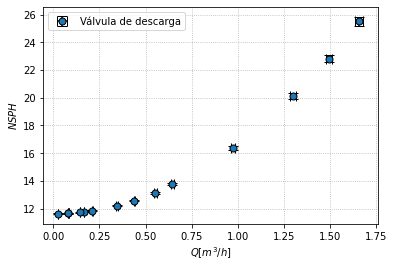

In [28]:
fig, ax = plt.subplots()
ax.set(ylabel=r'$NSPH$', xlabel=r'$Q [m^3/h]$')

NSPH = func_cavitation(pe, fk.Q2v(Q, De))

fk.error(fk.Q2v(Q, De), NSPH, 'o', 'Válvula de descarga', ax)

ax.legend()
ax.grid(ls='dotted')
fig.savefig('Q_x_NSPH.pdf', bbox_inches='tight')

In [29]:
xx = pd.DataFrame({'Q':fk.Q2v(Q, De), 'NPSH':NSPH, 'NPSH0':NSPH0})
print(xx.to_latex(index=0))

\begin{tabular}{lll}
\toprule
                 Q &          NPSH &         NPSH0 \\
\midrule
     1.658+/-0.019 &  25.53+/-0.32 &  12.04+/-0.06 \\
     1.496+/-0.017 &  22.82+/-0.26 &  11.84+/-0.05 \\
     1.299+/-0.015 &  20.12+/-0.20 &  11.84+/-0.05 \\
     0.973+/-0.011 &  16.38+/-0.12 &  11.74+/-0.05 \\
     0.646+/-0.008 &  13.78+/-0.07 &  11.74+/-0.05 \\
     0.554+/-0.006 &  13.14+/-0.06 &  11.64+/-0.05 \\
     0.440+/-0.005 &  12.59+/-0.05 &  11.64+/-0.05 \\
     0.345+/-0.004 &  12.22+/-0.05 &  11.64+/-0.05 \\
   0.2101+/-0.0025 &  11.86+/-0.05 &  11.64+/-0.05 \\
   0.1661+/-0.0019 &  11.78+/-0.05 &  11.64+/-0.05 \\
   0.1436+/-0.0017 &  11.74+/-0.05 &  11.64+/-0.05 \\
   0.0812+/-0.0009 &  11.67+/-0.05 &  11.64+/-0.05 \\
   0.0812+/-0.0009 &  11.67+/-0.05 &  11.64+/-0.05 \\
 0.02620+/-0.00031 &  11.64+/-0.05 &  11.64+/-0.05 \\
\bottomrule
\end{tabular}



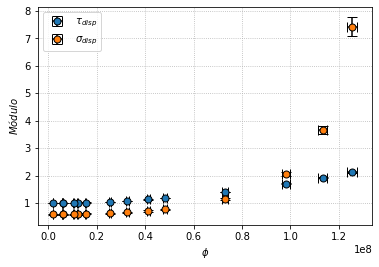

In [30]:
fig, ax = plt.subplots()
ax.set(ylabel=r'$Módulo$', xlabel=r'$\phi$')

NSPH0 = func_cavitation(pe, fk.Q2v(0, De))

fk.error(b1.phi(Q, w, De), NSPH/NSPH0, 'o', r'$\tau_{disp}$', ax)
fk.error(b1.phi(Q, w, De), NSPH/b1.hu, 'o', r'$\sigma_{disp}$', ax)

ax.legend()
ax.grid(ls='dotted')
fig.savefig('phi_x_NSPH.pdf', bbox_inches='tight')

In [31]:
xx = pd.DataFrame({'tau':NSPH/NSPH0, 'sigma': NSPH/b1.hu, 'phi':b1.phi(Q, w, De), 'nqu':b1.nq_u(Q, w)})
print(xx.to_latex(index=0))

\begin{tabular}{llll}
\toprule
                 tau &          sigma &                  phi &          nqu \\
\midrule
       2.120+/-0.027 &    7.42+/-0.35 &  (1.255+/-0.021)e+08 &      262+/-9 \\
       1.927+/-0.022 &    3.65+/-0.14 &  (1.133+/-0.019)e+08 &      159+/-5 \\
       1.699+/-0.017 &    2.06+/-0.07 &    (9.81+/-0.16)e+07 &  106.3+/-3.0 \\
       1.396+/-0.009 &    1.14+/-0.04 &    (7.31+/-0.12)e+07 &   69.1+/-1.9 \\
       1.174+/-0.004 &  0.771+/-0.024 &    (4.82+/-0.08)e+07 &   48.1+/-1.3 \\
     1.1292+/-0.0031 &  0.711+/-0.022 &    (4.13+/-0.07)e+07 &   43.5+/-1.1 \\
     1.0816+/-0.0019 &  0.663+/-0.021 &    (3.27+/-0.05)e+07 &   38.1+/-1.0 \\
     1.0501+/-0.0012 &  0.627+/-0.020 &    (2.56+/-0.04)e+07 &   33.2+/-0.9 \\
     1.0186+/-0.0004 &  0.609+/-0.019 &  (1.553+/-0.026)e+07 &   26.0+/-0.7 \\
   1.01162+/-0.00028 &  0.595+/-0.018 &  (1.228+/-0.020)e+07 &   22.8+/-0.6 \\
   1.00868+/-0.00021 &  0.588+/-0.018 &  (1.061+/-0.018)e+07 &   21.1+/-0.6 \\
   1.00278+/

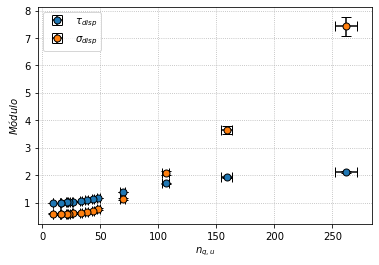

In [32]:
fig, ax = plt.subplots()
ax.set(ylabel=r'$Módulo$', xlabel=r'$n_{q, u}$')

fk.error(b1.nq_u(Q, w), NSPH/NSPH0, 'o', r'$\tau_{disp}$', ax)
fk.error(b1.nq_u(Q, w), NSPH/b1.hu, 'o', r'$\sigma_{disp}$', ax)

ax.legend()
ax.grid(ls='dotted')
fig.savefig('n_x_NSPH.pdf', bbox_inches='tight')